# Phase 1 - Week 2 - Day 1 PM - KNN & Naive Bayes

For this tutorial, we will classify with the iris dataset. Here is the brief of the dataset.

<img src='https://miro.medium.com/v2/resize:fit:4800/format:webp/1*f6KbPXwksAliMIsibFyGJw.png'>

The Iris Dataset contains four features :
1. `sepal length` (in cm)
2. `sepal width` (in cm)
3. `petal length` (in cm)
4. `petal width` (in cm)

The dataset contains 50 samples of three species of Iris : `setosa`, `virginica`, and `versicolor`.

# A. Import Library

In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, f1_score

# B. Data Loading & Feature Engineering

In [2]:
# Data Loading

df_iris = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w2/P1W2D1PM%20-%20KNN%20%26%20Naive%20Bayes%20-%20Iris.csv')
df_iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
# Split between Features and Target
X = df_iris.drop("variety", axis=1)
y = df_iris['variety']

# Split between Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=46)

print('Train Size : ', y_train.shape)
print('Test Size  : ', y_test.shape)

Train Size :  (127,)
Test Size  :  (23,)


In [4]:
# Feature Scaling using StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Feature Encoding Target

encoder = LabelEncoder()
encoder.fit(y_train)

y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)

# C. Modeling

## C.1 - K-Nearest Neighbors (KNN)

In [6]:
# Training using KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train_encoded)

KNeighborsClassifier(n_neighbors=3)

In [7]:
# Model Prediction

y_pred_train_knn = knn.predict(X_train_scaled)
y_pred_test_knn = knn.predict(X_test_scaled)

In [8]:
# Model Evaluation - Train Set & Test Set

print(classification_report(y_train_encoded, y_pred_train_knn))
print(classification_report(y_test_encoded, y_pred_test_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.95      0.93      0.94        44
           2       0.93      0.95      0.94        44

    accuracy                           0.96       127
   macro avg       0.96      0.96      0.96       127
weighted avg       0.96      0.96      0.96       127

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.86      1.00      0.92         6
           2       1.00      0.83      0.91         6

    accuracy                           0.96        23
   macro avg       0.95      0.94      0.94        23
weighted avg       0.96      0.96      0.96        23



Let's check the effect of different neighbors in our case.

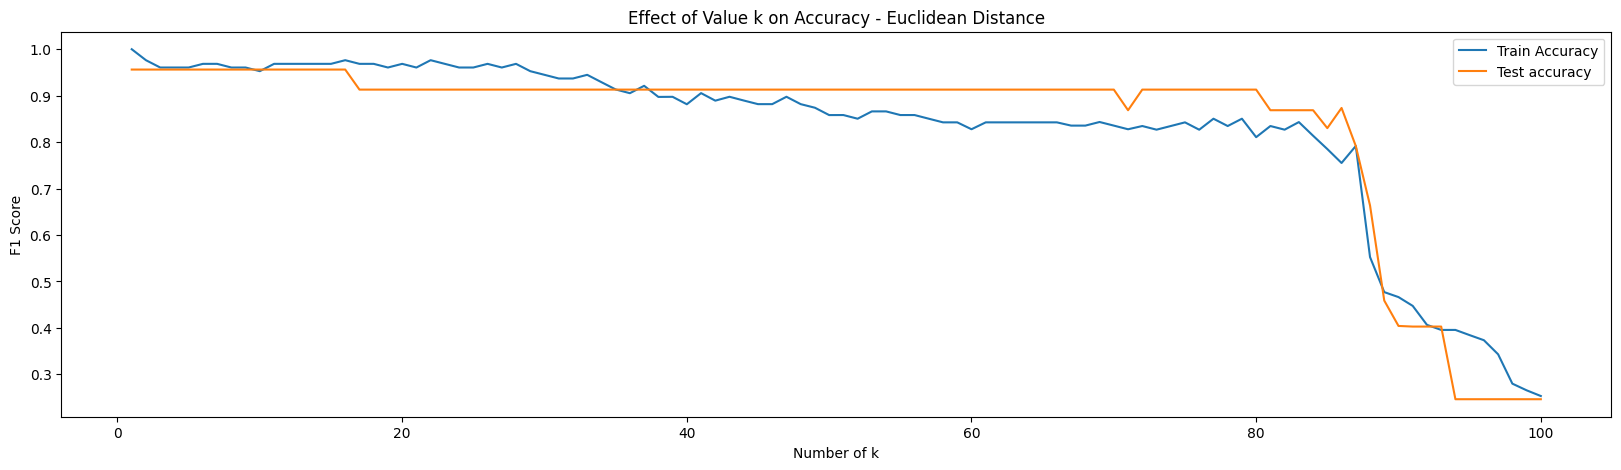

CPU times: user 1.93 s, sys: 136 ms, total: 2.07 s
Wall time: 1.53 s


In [9]:
# Get F1 Score from k = 1 to k = 15
%%time

max_k = 100

train_acc = []
test_acc = []

for loop in range (1, max_k+1):
  knn = KNeighborsClassifier(n_neighbors = loop)
  knn.fit(X_train_scaled, y_train_encoded)

  y_pred_train_knn = knn.predict(X_train_scaled)
  y_pred_test_knn = knn.predict(X_test_scaled)

  train_acc.append(f1_score(y_train_encoded, y_pred_train_knn, average='weighted'))
  test_acc.append(f1_score(y_test_encoded, y_pred_test_knn, average='weighted'))

# Visualization of Accuracy
plt.figure(figsize=(20,5))
plt.title('Effect of Value k on Accuracy - Euclidean Distance')
plt.plot(range(1, max_k+1), train_acc, label='Train Accuracy')
plt.plot(range(1, max_k+1), test_acc, label='Test accuracy')

plt.legend()
plt.xlabel('Number of k')
plt.ylabel('F1 Score')
plt.show()

**CONCLUSION**

The more the number of neighbors used, the lower the performance of the model both in terms of train performance and test performance.

## C.2 - Naive Bayes

In [10]:
# Training using Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train_encoded)

GaussianNB()

In [11]:
# Model Prediction

y_pred_train_nb = nb.predict(X_train_scaled)
y_pred_test_nb = nb.predict(X_test_scaled)

In [12]:
# Model Evaluation - Train Set & Test Set

print(classification_report(y_train_encoded, y_pred_train_nb))
print(classification_report(y_test_encoded, y_pred_test_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.95      0.93      0.94        44
           2       0.93      0.95      0.94        44

    accuracy                           0.96       127
   macro avg       0.96      0.96      0.96       127
weighted avg       0.96      0.96      0.96       127

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.83      0.83      0.83         6
           2       0.83      0.83      0.83         6

    accuracy                           0.91        23
   macro avg       0.89      0.89      0.89        23
weighted avg       0.91      0.91      0.91        23



**CONCLUSION**

The performance of KNN and Naive Bayes is relatively the same around `96 %` in the train-set. However, in testing, we can see that KNN has greater accuracy (`96 %`) than Naive Bayes (`91 %`).